In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 타이타닉데이터 합쳐서 분석하기
- Name 이라는 피쳐가 결혼유무나 성별을 확인할 수 있는 하나의 피쳐로도 바라볼 수 있다.
- 이 피쳐를 통해 우리가 결혼이나 다른 피쳐를 추가해서 만들 수 있다.
- Name 어떤 식으로 가공할까?
- 문자열, 정규표현식 이용해서 피쳐 가공 가능
- 정규표현식을 이용한 피쳐 가공 (Name 피쳐)

In [6]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [7]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

# Name 컬럼 전처리
- str 문법
- 문자열 데이터에 대한 전처리 작업 진행시 사용해
- 시리즈, 데이터프레임으로 잡고 .str.원하는문법 ( extract, 여러가지가 있다. findall)
- 정규표현식을 사용할 예정이니, (정규표현식을 넣을 예정)

In [8]:
for df in combine:
    df['Name_re'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True) 

In [13]:
# 실제 성별과 Name_re 만든 피처가 실제 잘 매핑이 되었는지 간단한 검증?
# 판다스에서 제공하는 crosstab() 피벗테이블의 개념 엑셀의 개념으로

pd.crosstab(train_df['Name_re'],train_df['Sex']) #다른 피처넣어보면서 어떤 관계인지는 확인해 보시면 좋다.

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 그냥 그대로 다 가지고 가면 피처의 값들의 범위가 너무 넒어지고 의미 없이 피처가 만들어지는 것과 같다
- 그래서 이름을 구간화해서 묶어주어야함.

In [14]:
# replace 파이썬 기초문법
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Name_re'] = df['Name_re'].replace('Mlle','Miss')
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Miss')


In [15]:
train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean()

,Name_re,Survived
0,Capt,0.000000
1,Master,0.575000
2,Miss,0.704301
3,Mr,0.156673
4,Mrs,0.792000
5,Rare,0.363636


In [16]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


- Name_re 에서 나온 값들을 -> 수치로 변경하는 것
- 인코딩 작업
- 레이블인코딩, 원핫인코딩, 그외에 인코딩도 많지만 대표적으로 이 두 가지

- 레이블인코딩 : 1,2,3,4,5,6 해당 값에 순서를 매칭해서 변경해 준다. Mr 1 Mrs 2, Rare 3, Miss 4 등등
- 원핫인코딩 : 0,1로만 피처를 만들어 준다.
- Mr, Mrs, Rare, Miss 컬럼으로 만들어 준다.
- 이 컬럼에 대응하는 값이 0,1 인지를 인덱스기준으로 매핑한다.

In [17]:
# 레이블인코딩으로 변환
name_re = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re) #map함수와 판다스의 시리즈가 만나서 해당 값으로 변환해 준다.
    df['Name_re'] = df['Name_re'].fillna(0)



In [18]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1.0


# Sex 컬럼 전처리
## 원핫인코딩의 개념으로

- Sex 를 전처리하기 딱 좋은 Male, Female -> 0,1 생존확률이 높은 사람은 여성이었고, 여성을 1, 남성을 0

In [19]:
#전처리 후 남은 사용한 컬럼은 제거
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [20]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype(int)

In [30]:
df['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [31]:
train_df.isna().sum() #null값

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

# age 컬럼 전처리
- Missing Value 대체하는 방법
- MICE
- 보간법
- 단순한 기초통계치로 대체하는 법
- KNN, ML 기법을 통해서 대체하는 법

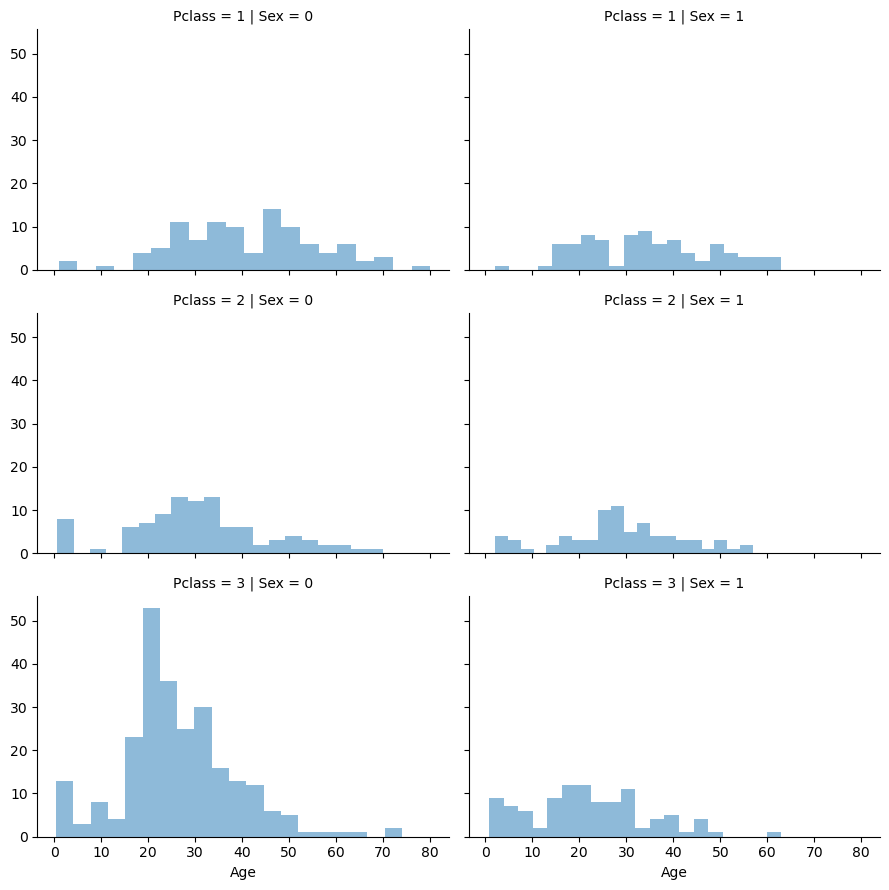

In [32]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect =1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

이후는 휴회기간 끝나고 설명 다시 해주신다 하심.

- 단순하게 Age 평균으로 대체하면 -> Median
- Pclass, Sex 따라서 2차원으로 나눈 후 -> 그 값들의 Median, Mean 대체를 한다.

In [34]:
guess_ages = np.zeros((2,3)) # np.zeros 0값 넣는다. 일단 na값을 채워넣을 주머니 하나 만들었다.

In [35]:
## 결측치를 채울 코드는?
## pclass, 성별 2 두가지의 차원으로 결측치를 바라볼 것
## 두 가지의 피처로 값을 추출하면서 이 값의 median의 값을 -> guess_ages 넣어서 대체하면 된다.
## age는 22.1살 22.7살 없다. 반올림을 하는 작업을 진행해야 한다.

for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex']==i) & (df['Pclass']==j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = (age_guess/0.5 + 0.5) * 0.5


    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull()) & (df.Sex ==i)&(df.Pclass==j+1), 'Age'] = guess_ages[i,j]
    df['Age'] = df['Age'].astype(int)

In [36]:
train_df.Age.isna().sum()

0